#### https://www.kaggle.com/kinguistics/heartbeat-sounds

In [1]:
import pandas as pd

#### 列出檔案

In [2]:
set_a = pd.read_csv("data/set_a.csv")
set_b = pd.read_csv("data/set_b.csv")
set_a_timing = pd.read_csv("data/set_a_timing.csv")

In [3]:
set_a

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN
...,...,...,...,...
171,a,set_a/__201108222241.wav,NaN,NaN
172,a,set_a/__201108222244.wav,NaN,NaN
173,a,set_a/__201108222247.wav,NaN,NaN
174,a,set_a/__201108222254.wav,NaN,NaN


In [4]:
set_a_timing

,fname,cycle,sound,location
0,set_a/normal__201102081321.wav,1,S1,10021
1,set_a/normal__201102081321.wav,1,S2,20759
2,set_a/normal__201102081321.wav,2,S1,35075
3,set_a/normal__201102081321.wav,2,S2,47244
4,set_a/normal__201102081321.wav,3,S1,62992
...,...,...,...,...
385,set_a/normal__201108011118.wav,10,S2,284673
386,set_a/normal__201108011118.wav,11,S1,300863
387,set_a/normal__201108011118.wav,11,S2,314279
388,set_a/normal__201108011118.wav,12,S1,330980


- install librosa

conda install -c conda-forge librosa

https://musicinformationretrieval.com/ipython_audio.html

In [5]:
import os
files = [f for f in os.listdir('data/set_a/') if os.path.isfile(os.path.join('data/set_a/', f))]
files

['artifact__201106161219.wav',
 'normal__201105021804.wav',
 'Aunlabelledtest__201106100606.wav',
 'extrahls__201102071835.wav',
 'murmur__201108222232.wav',
 'artifact__201105060108.wav',
 'artifact__201106111119.wav',
 'Aunlabelledtest__201108222257.wav',
 'murmur__201101051104.wav',
 'artifact__201105040918.wav',
 'murmur__201104291843.wav',
 'Aunlabelledtest__201106130440.wav',
 'Aunlabelledtest__201103200518.wav',
 'artifact__201106010602.wav',
 'Aunlabelledtest__201101051105.wav',
 'artifact__201106211041.wav',
 'extrahls__201101160808.wav',
 'extrahls__201104270458.wav',
 'extrahls__201103182227.wav',
 'normal__201102201230.wav',
 'Aunlabelledtest__201106031556.wav',
 'Aunlabelledtest__201108222234.wav',
 'Aunlabelledtest__201108011113.wav',
 'artifact__201106171003.wav',
 'normal__201102081152.wav',
 'Aunlabelledtest__201106120928.wav',
 'murmur__201101180902.wav',
 'artifact__201106070949.wav',
 'Aunlabelledtest__201105031730.wav',
 'Aunlabelledtest__201106040930.wav',
 'Aunla

#### pick a wav file

In [6]:
wav_file = "data/set_a/normal__201105021804.wav"

#### basic information about the wav file

In [7]:
import librosa
x, sr = librosa.load(wav_file)
print("x={}".format(x))
print("x.shape={}".format(x.shape))
print("sr={}".format(sr))

x=[-0.0219472  -0.03220462 -0.02844228 ...  0.01611549  0.01432218
  0.01443175]
x.shape=(198450,)
sr=22050


In [8]:
type(x)

numpy.ndarray

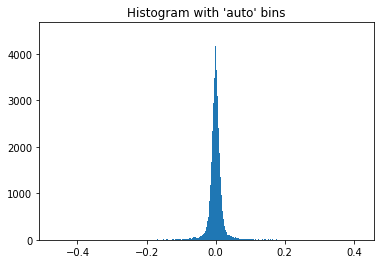

In [9]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
import matplotlib.pyplot as plt 
_ = plt.hist(x, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [10]:
#https://blog.louie.lu/2017/07/27/random-python-standard-library-02/
#https://medium.com/@rrfd/testing-for-normality-applications-with-python-6bf06ed646a9
import scipy
import random
scipy.stats.shapiro(random.sample(list(x),5000))

(0.5785057544708252, 0.0)

mean of x=-3.6757053749170154e-05
std of x=0.03034084662795067


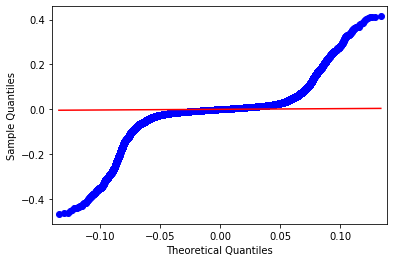

In [11]:
#https://medium.com/@rrfd/testing-for-normality-applications-with-python-6bf06ed646a9
import numpy as np
import statsmodels.api as sm
import pylab
print("mean of x={}".format(x.mean()))
print("std of x={}".format(x.std()))
sm.qqplot(x, loc = np.mean(x), scale = np.std(x), line='s')
pylab.show()

mean of x=-3.6757053749170154e-05
(單標準差68%)std of x=0.03034084662795067
(1.64標準差,90%)std*1.64=0.049758988469839095
(1.96標準差,95%)std*1.96=0.05946805939078331


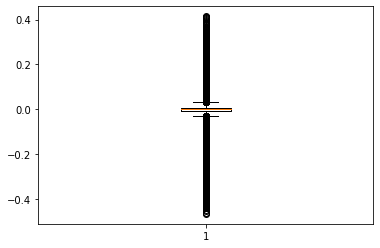

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.boxplot(x)
print("mean of x={}".format(np.mean(x)))
print("(單標準差68%)std of x={}".format(np.std(x)))
print("(1.64標準差,90%)std*1.64={}".format(np.std(x)*1.64))
print("(1.96標準差,95%)std*1.96={}".format(np.std(x)*1.96))

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

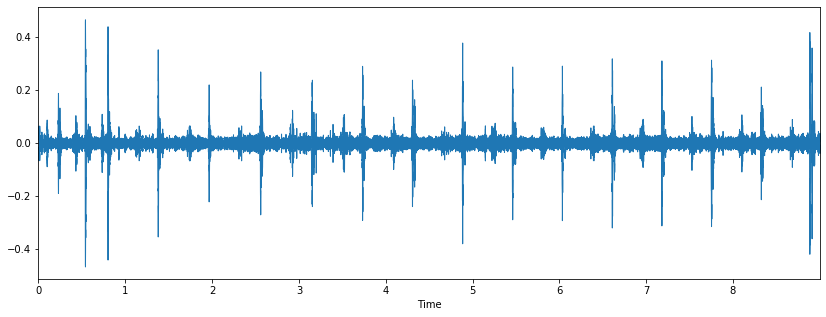

In [14]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

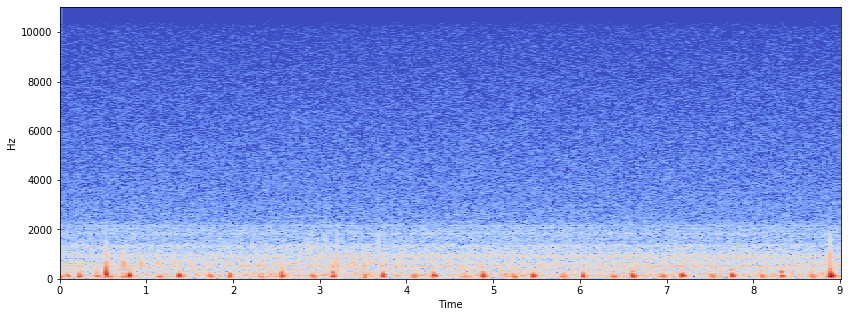

In [15]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

#### play wav file

In [16]:
import IPython.display as ipd
ipd.Audio(wav_file) # load a local WAV file

- 給定rate後, 可以播放ndarray

In [17]:
import IPython.display as ipd
ipd.Audio(x, rate=sr) # load a local WAV file

#### 去噪1
- https://librosa.github.io/librosa/generated/librosa.decompose.nn_filter.html

In [18]:
denoisetest_y, denoisetest_sr = librosa.load(wav_file, offset=0, duration=10)

In [19]:
import IPython.display as ipd
ipd.Audio(denoisetest_y, rate=denoisetest_sr) # load a local WAV file

In [20]:
import numpy as np
chroma = librosa.feature.chroma_cqt(y=denoisetest_y, sr=denoisetest_sr)
chroma_med = librosa.decompose.nn_filter(chroma,
                                         aggregate=np.median,
                                         metric='cosine')

In [21]:
rec = librosa.segment.recurrence_matrix(chroma, 
                                        mode='affinity',
                                        metric='cosine', 
                                        sparse=True)
chroma_nlm = librosa.decompose.nn_filter(chroma, 
                                         rec=rec,
                                         aggregate=np.average)

- https://librosa.github.io/librosa/generated/librosa.display.specshow.html

```python
def specshow(data, x_coords=None, y_coords=None,
             x_axis=None, y_axis=None,
             sr=22050, hop_length=512,
             fmin=None, fmax=None,
             tuning=0.0,
             bins_per_octave=12,
             ax=None,
             **kwargs):
```

#### 去噪2
- 自己想的, 直接減!

In [23]:
import IPython.display as ipd
ipd.Audio(denoisetest_y, rate=denoisetest_sr) # load a local WAV file

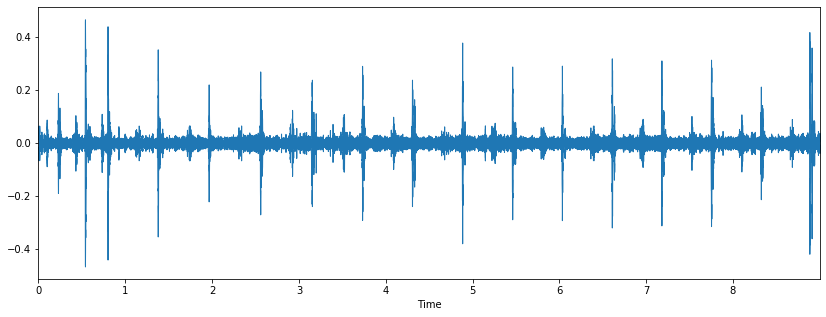

In [24]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(denoisetest_y, sr=sr)

#### 去噪3
- https://timsainburg.com/noise-reduction-python.html